In [1]:
#!apt install ffmpeg

In [2]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import multivariate_normal

import pathlib
import os
np.random.seed(0)

### Create a dataset

In [3]:
K=3 # number of sources
d=2 # dimension of the data
    
def create_dataset():
    # Create dataset
    
    X=[]
    mu1=[2,2]
    Sigma1=np.array([[3,-2],[-2,3]])
    Gauss1= multivariate_normal(mean=mu1,cov=Sigma1)
    samples1=Gauss1.rvs(20) # Draw random samples from the multivariate normal distribution.

    mu2=[-8,-4]
    Sigma2=np.array([[4,2],[2,4]])
    Gauss2= multivariate_normal(mean=mu2,cov=Sigma2)
    samples2=Gauss2.rvs(40)

    mu3=[-8,7]
    Sigma3=np.array([[1,0],[0,1]])
    Gauss3= multivariate_normal(mean=mu3,cov=Sigma3)
    samples3=Gauss3.rvs(60)

    X=np.vstack((samples1,samples2,samples3))
    
    np.random.shuffle(X)
    return X


In [4]:
X=create_dataset()
n_samples = len(X)
print(X.shape)

(120, 2)


Text(0.5, 1.0, 'Dataset')

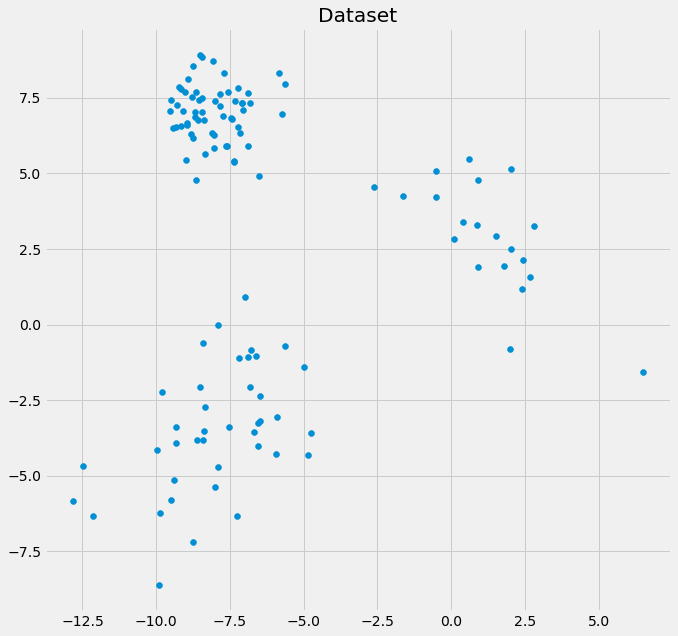

In [5]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.scatter(X[:,0],X[:,1])
ax.set_title('Dataset')

In [6]:
n_samples

120

In [7]:
pathlib.Path('frames').mkdir(parents=True, exist_ok=True) 

In [8]:
# !rm -r frames

In [9]:
!dir

drive  frames  movie.mp4  sample_data


In [10]:
for i in np.arange(n_samples):
  fig = plt.figure(figsize=(15,15))
  plt.plot(X[:i,0],X[:i,1],'bo', markersize=20)
  ax = plt.axes()
  ax.set_xlim([-17, 10])
  ax.set_ylim([-12, 12])
  ax.set_title('Dataset')

  plt.show()
  plt.pause(0.1)
  fig.savefig(f'frames/sampling_{10000+i}.png')
  print(f'iter: {i}')
  #plt.pause(0.1)

  

Output hidden; open in https://colab.research.google.com to view.

In [11]:
!rm *.mp4

In [12]:
!dir frames

sampling_10000.png  sampling_10030.png	sampling_10060.png  sampling_10090.png
sampling_10001.png  sampling_10031.png	sampling_10061.png  sampling_10091.png
sampling_10002.png  sampling_10032.png	sampling_10062.png  sampling_10092.png
sampling_10003.png  sampling_10033.png	sampling_10063.png  sampling_10093.png
sampling_10004.png  sampling_10034.png	sampling_10064.png  sampling_10094.png
sampling_10005.png  sampling_10035.png	sampling_10065.png  sampling_10095.png
sampling_10006.png  sampling_10036.png	sampling_10066.png  sampling_10096.png
sampling_10007.png  sampling_10037.png	sampling_10067.png  sampling_10097.png
sampling_10008.png  sampling_10038.png	sampling_10068.png  sampling_10098.png
sampling_10009.png  sampling_10039.png	sampling_10069.png  sampling_10099.png
sampling_10010.png  sampling_10040.png	sampling_10070.png  sampling_10100.png
sampling_10011.png  sampling_10041.png	sampling_10071.png  sampling_10101.png
sampling_10012.png  sampling_10042.png	sampling_10072.png  sampl

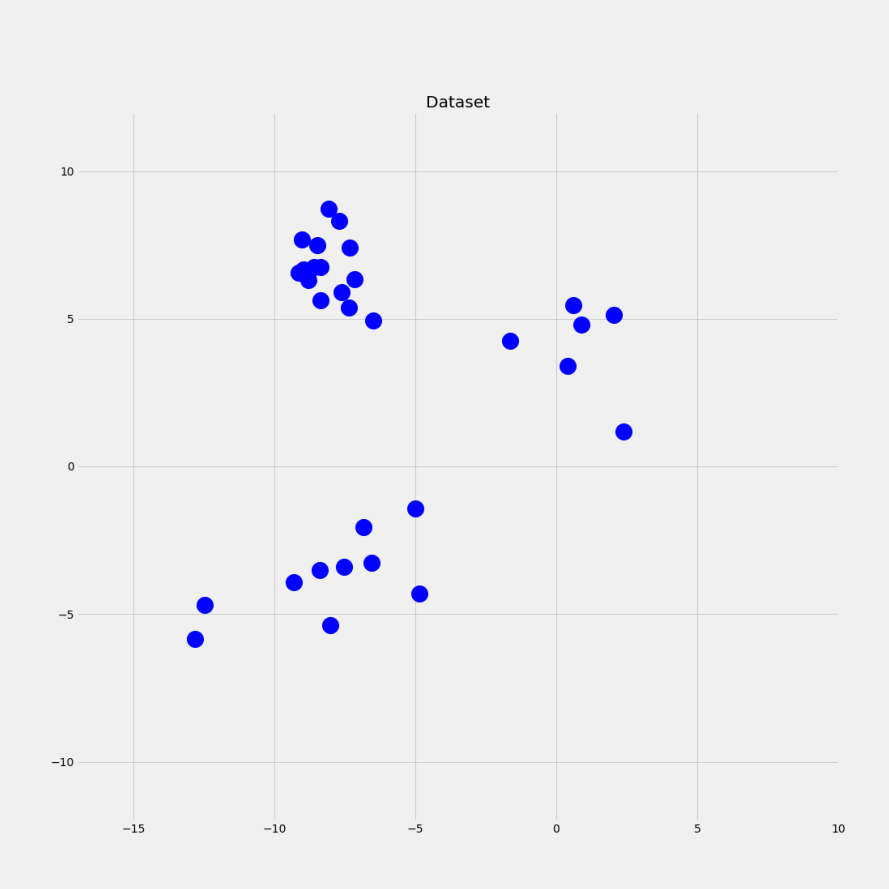

In [13]:
fig = plt.figure(figsize=(15,15))
img=plt.imread('frames/sampling_10032.png')
plt.axis('off')
plt.imshow(img)

In [21]:
frames_dir = 'frames'
video_path = 'movie.mp4'

cmd = 'ffmpeg -r 8 -i %s/sampling_1%%04d.png -c:v libx264 -pix_fmt yuv420p %s' % (frames_dir, video_path)

In [22]:
!dir

drive  frames  sample_data


In [23]:
print(cmd)
os.system(cmd)

ffmpeg -r 8 -i frames/sampling_1%04d.png -c:v libx264 -pix_fmt yuv420p movie.mp4


0

In [24]:
!dir

drive  frames  movie.mp4  sample_data


In [25]:
from google.colab import drive 
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
!cp movie.mp4 '/content/drive/MyDrive/Colab_ML_Tutorials/Datasets/'
